# 1. Introduction 👋


# 2. Importing Libraries 📚
👉 **Importing libraries** that will be used in this notebook.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 3. Reading Data Set 👓
👉 After importing libraries, we will also **import the dataset** that will be used.

In [7]:
df_drug = pd.read_csv("cats_dataset.csv")

👉 Read the first 6 rows in the dataset.

In [8]:
df_drug.head()

Breed  Age (Years)  Weight (kg)          Color  Gender
0      Russian Blue           19            7  Tortoiseshell  Female
1  Norwegian Forest           19            9  Tortoiseshell  Female
2         Chartreux            3            3          Brown  Female
3           Persian           13            6          Sable  Female
4           Ragdoll           10            8          Tabby    Male

👉 Data type and checking null in dataset.

In [9]:
print(df_drug.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Breed        1000 non-null   object
 1   Age (Years)  1000 non-null   int64 
 2   Weight (kg)  1000 non-null   int64 
 3   Color        1000 non-null   object
 4   Gender       1000 non-null   object
dtypes: int64(2), object(3)
memory usage: 39.2+ KB
None


In [10]:
df_drug.isna().sum()

Breed          0
Age (Years)    0
Weight (kg)    0
Color          0
Gender         0
dtype: int64

👉 From the results above, **there are no missing/null value** in this dataset

# 4. Initial Dataset Exploration 🔍
👉 This section will explore raw dataset that has been imported.

## 4.1 Categorical Variables 📊

In [11]:
df_drug.Breed.value_counts()

Ragdoll               51
American Shorthair    40
Egyptian Mau          39
Persian               37
Oriental              37
British Shorthair     36
Burmese               36
Balinese              35
Bengal                35
Siberian              34
Birman                33
Manx                  33
Maine Coon            33
Abyssinian            33
Ocicat                33
Chartreux             33
Singapura             32
Munchkin              32
Sphynx                32
Siamese               32
Exotic Shorthair      31
Turkish Angora        31
Savannah              31
Scottish Fold         31
Tonkinese             30
Himalayan             30
Cornish Rex           29
Devon Rex             28
Russian Blue          28
Norwegian Forest      25
Name: Breed, dtype: int64

👉 It can be seen that from results above, DrugY has more amount than other types of drugs

In [12]:
df_drug.Color.value_counts()

Tricolor         73
Gray             73
Pointed          70
Bicolor          69
Sable            68
Cream            68
Black            67
Red              67
Tortoiseshell    66
Brown            64
Tabby            64
Calico           64
Orange           64
Blue             63
White            60
Name: Color, dtype: int64

👉 The distribution of patient gender is balanced.

In [13]:
df_drug.Gender.value_counts()

Male      505
Female    495
Name: Gender, dtype: int64

👉 The distribution of blood pressure level is balanced.

👉 The distribution of cholesterol level is balanced.

## 4.2 Numerical Variables 🔢
👉 This section will show mean, count, std, min, max and others using describe function. The skewness value for each numerical variables will also shown in this section.

In [14]:
df_drug.describe()

Age (Years)  Weight (kg)
count  1000.000000   1000.00000
mean     10.210000      5.55000
std       5.535751      2.22676
min       1.000000      2.00000
25%       5.000000      4.00000
50%      10.000000      6.00000
75%      15.000000      7.00000
max      19.000000      9.00000

In [20]:
# 1. Handle Missing Values
# For categorical columns, fill with mode
for column in ['Breed', 'Color','Gender']:
    mode_val = df_drug[column].mode()[0]
    df_drug[column].fillna(mode_val, inplace=True)

# For numerical columns, fill with median
for column in ['Age (Years)', 'Weight (kg)']:
    median_val = df_drug[column].median()
    df_drug[column].fillna(median_val, inplace=True)

check double values

In [21]:
df_drug.duplicated().sum()

5

In [22]:
df_drug.drop_duplicates(inplace=True)


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


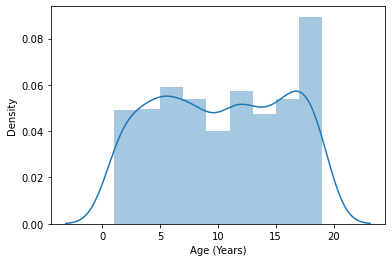

In [23]:
sns.distplot(df_drug['Age (Years)']);

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


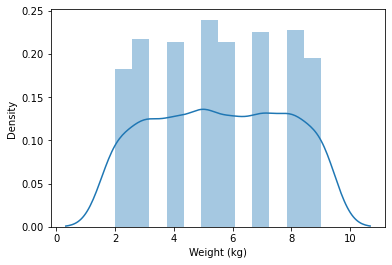

In [24]:
sns.distplot(df_drug['Weight (kg)']);

👉The distribution of **'Age'** column is **symetric**, since the skewness value  between -0.5 and 0.5 <br>
👉The distribution of **'Na_to_K'** column is **moderately skewed**, since the skewness value is ***between 0.5 and 1***. It can also be seen from the histogram for 'Na_to_K' column

# 5. EDA 📊
👉 This section will explore variables in the dataset using different various plots/charts.

## 5.1 Drug Type Distribution 💊

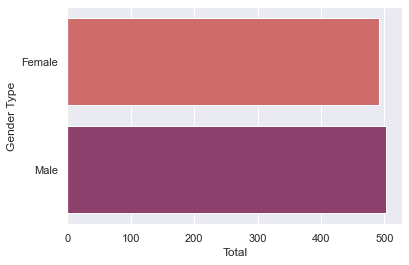

In [26]:
sns.set_theme(style="darkgrid")
sns.countplot(y="Gender", data=df_drug, palette="flare")
plt.ylabel('Gender Type')
plt.xlabel('Total')
plt.show()

## 5.2 Gender Distribution 👫

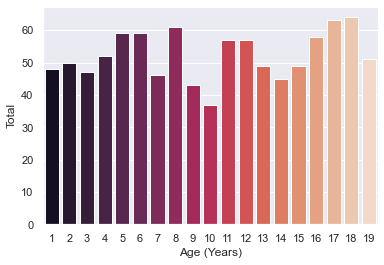

In [27]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Age (Years)", data=df_drug, palette="rocket")
plt.xlabel('Age (Years)')
plt.ylabel('Total')
plt.show()

## 5.3 Blood Pressure Distribution 🩸

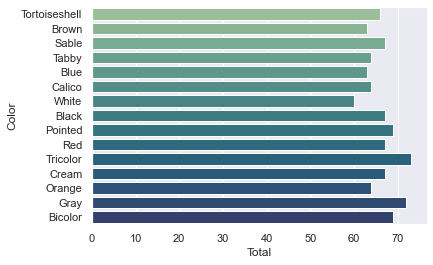

In [28]:
sns.set_theme(style="darkgrid")
sns.countplot(y="Color", data=df_drug, palette="crest")
plt.ylabel('Color')
plt.xlabel('Total')
plt.show()

## 5.4 Cholesterol Distribution 🥛

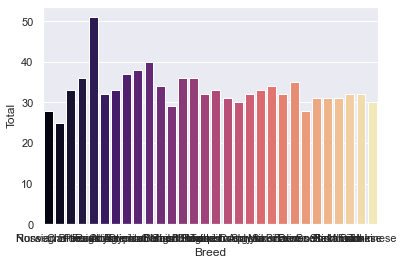

In [29]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Breed", data=df_drug, palette="magma")
plt.xlabel('Breed')
plt.ylabel('Total')
plt.show()

## 5.5 Gender Distribution based on Drug Type 👫💊

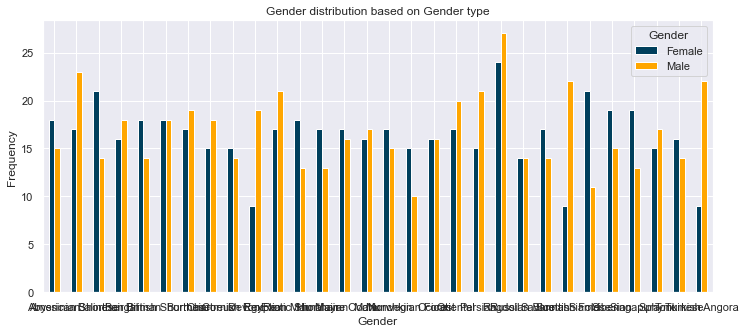

In [30]:
pd.crosstab(df_drug.Breed,df_drug.Gender).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('Gender distribution based on Gender type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

## 5.6 Blood Pressure Distribution based on Cholesetrol 🩸🥛

## 5.7 Sodium to Potassium Distribution based on Gender and Age 🧪👫👴

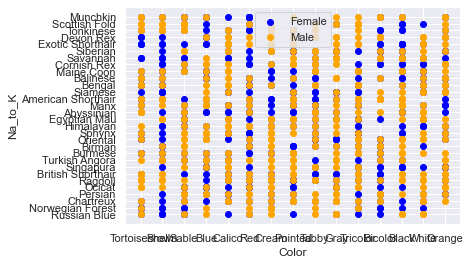

In [39]:
plt.scatter(x=df_drug.Color[df_drug.Gender=='Female'], y=df_drug.Breed[(df_drug.Gender=='Female')], c="Blue")
plt.scatter(x=df_drug.Color[df_drug.Gender=='Male'], y=df_drug.Breed[(df_drug.Gender=='Male')], c="Orange")
plt.legend(["Female", "Male"])
plt.xlabel("Color")
plt.ylabel("Na_to_K")
plt.show()

In [40]:
print(df_drug.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 995 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Breed        995 non-null    object
 1   Age (Years)  995 non-null    int64 
 2   Weight (kg)  995 non-null    int64 
 3   Color        995 non-null    object
 4   Gender       995 non-null    object
dtypes: int64(2), object(3)
memory usage: 46.6+ KB
None


# 6. Dataset Preparation ⚙
👉 This section will prepare the dataset before building the machine learning models.

In [38]:
df_drug.describe()

Age (Years)  Weight (kg)
count   995.000000   995.000000
mean     10.196985     5.542714
std       5.531817     2.227714
min       1.000000     2.000000
25%       5.000000     4.000000
50%      10.000000     6.000000
75%      15.000000     7.000000
max      19.000000     9.000000

## 6.1 Data Binning 🚮

### 6.1.1 Age 👴
👉 The age will be divided into **7 age categories**:
*  Below 20 y.o.
*  20 - 29 y.o.
*  30 - 39 y.o.
*  40 - 49 y.o.
*  50 - 59 y.o.
*  60 - 69 y.o.
*  Above 70.

In [41]:
bin_age = [0,1, 2, 3, 16]
category_age = ['<1', '1-2', '2-3', '>3']
df_drug['Age (Years)_binned'] = pd.cut(df_drug['Age (Years)'], bins=bin_age, labels=category_age)
df_drug = df_drug.drop(['Age (Years)Weight (kg)'], axis = 1)

### 6.1.2 Na_to_K 🧪
👉 The chemical ratio will be divided into **4 categories**:
*  Below 10.
*  10 - 20.
*  20 - 30.
*  Above 30.

In [42]:
bin_age = [0,2, 4, 7,9]
category_age = ['<2', '2-4', '4-7', '>7']
df_drug['Weight (kg)_binned'] = pd.cut(df_drug['Weight (kg)'], bins=bin_age, labels=category_age)
df_drug = df_drug.drop(['Weight (kg)'], axis = 1)

## 6.2 Splitting the dataset 🪓
👉 The dataset will be split into **80% training and 20% testing**.

In [72]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [43]:
X = df_drug.drop(["Gender"], axis=1)
y = df_drug["Gender"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## 6.3 Feature Engineering 🔧
👉 The FE method that used is **one-hot encoding**, which is **transforming categorical variables into a form that could be provided to ML algorithms to do a better prediction**.

In [44]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [45]:
X_train.head()

Breed_Abyssinian  Breed_American Shorthair  Breed_Balinese  Breed_Bengal  \
914                 0                         0               0             0   
930                 0                         0               0             0   
979                 0                         0               0             0   
769                 0                         0               0             0   
916                 0                         0               0             0   

     Breed_Birman  Breed_British Shorthair  Breed_Burmese  Breed_Chartreux  \
914             0                        0              0                0   
930             1                        0              0                0   
979             0                        0              0                0   
769             0                        0              1                0   
916             0                        0              0                0   

     Breed_Cornish Rex  Breed_Devon Rex  ...  Color_Tricolor  Color_White  \
914                  0                0  ...               0            0   
930                  0                0  ...               0            0   
979                  0                0  ...               0            0   
769                  0                0  ...               0            0   
916                  0                0  ...               1            0   

     Age (Years)_binned_<1  Age (Years)_binned_1-2  Age (Years)_binned_2-3  \
914                      0                       0                       0   
930                      0                       0                       0   
979                      0                       0                       0   
769                      0                       0                       0   
916                      0                       0                       0   

     Age (Years)_binned_>3  Weight (kg)_binned_<2  Weight (kg)_binned_2-4  \
914                      1                      0                       0   
930                      0                      0                       1   
979                      0                      0                       0   
769                      0                      0                       0   
916                      1                      0                       0   

     Weight (kg)_binned_4-7  Weight (kg)_binned_>7  
914                       0                      1  
930                       0                      0  
979                       1                      0  
769                       1                      0  
916                       1                      0  

[5 rows x 53 columns]

In [46]:
X_test.head()

Breed_Abyssinian  Breed_American Shorthair  Breed_Balinese  Breed_Bengal  \
925                 0                         0               0             0   
528                 0                         0               0             0   
570                 0                         0               0             0   
661                 0                         0               0             0   
636                 0                         0               0             0   

     Breed_Birman  Breed_British Shorthair  Breed_Burmese  Breed_Chartreux  \
925             0                        0              0                0   
528             0                        0              0                0   
570             0                        0              0                0   
661             0                        1              0                0   
636             0                        0              0                0   

     Breed_Cornish Rex  Breed_Devon Rex  ...  Color_Tricolor  Color_White  \
925                  0                0  ...               0            0   
528                  0                0  ...               0            0   
570                  0                0  ...               0            0   
661                  0                0  ...               0            0   
636                  0                0  ...               1            0   

     Age (Years)_binned_<1  Age (Years)_binned_1-2  Age (Years)_binned_2-3  \
925                      0                       0                       0   
528                      0                       0                       0   
570                      0                       0                       0   
661                      0                       0                       0   
636                      0                       0                       0   

     Age (Years)_binned_>3  Weight (kg)_binned_<2  Weight (kg)_binned_2-4  \
925                      1                      0                       1   
528                      1                      0                       0   
570                      1                      0                       0   
661                      1                      0                       0   
636                      1                      0                       1   

     Weight (kg)_binned_4-7  Weight (kg)_binned_>7  
925                       0                      0  
528                       1                      0  
570                       1                      0  
661                       0                      1  
636                       0                      0  

[5 rows x 53 columns]

In [47]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Create a copy of the data to apply label encoding

# Apply LabelEncoder to the categorical columns
df_drug['Breed'] = le.fit_transform(df_drug['Breed'])
df_drug['Gender'] = le.fit_transform(df_drug['Gender'])
df_drug['Color'] = le.fit_transform(df_drug['Color'])
#df_drug['Drug'] = le.fit_transform(df_drug['Drug'])

df_drug.head()


Breed  Color  Gender Age (Years)_binned Weight (kg)_binned
0     21     12       0                NaN                4-7
1     16     12       0                NaN                 >7
2      7      3       0                2-3                2-4
3     19     10       0                 >3                4-7
4     20     11       1                 >3                 >7

## save cleaned data

In [48]:
df_drug.to_csv("Clean_data.csv",index=False)

In [49]:
df_drug = pd.read_csv('Clean_data.csv')

           Breed     Color    Gender
Breed   1.000000 -0.048668  0.012445
Color  -0.048668  1.000000  0.047123
Gender  0.012445  0.047123  1.000000


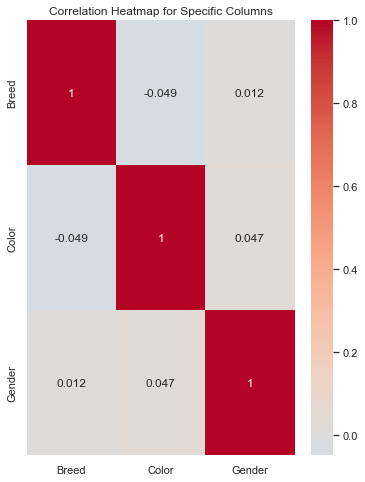

In [50]:
# Calculate correlation matrix for the specific columns
corr_matrix = df_drug.corr()
print(corr_matrix)
# Create a figure and set its size
plt.figure(figsize=(6, 8))

# Plot the correlation heatmap for the specific columns
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)

# Show the plot
plt.title('Correlation Heatmap for Specific Columns')
plt.show()


# 7. Models 🛠

## 7.1 Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='liblinear', max_iter=300)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

#print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

Logistic Regression accuracy is: 51.26%


In [52]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[49 55]
 [42 53]]


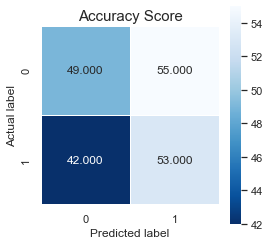

In [53]:
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score'
plt.title(all_sample_title, size = 15);

## save model

In [56]:
import joblib
model_filename = 'logistic_regression_model.joblib'
joblib.dump(LRclassifier, model_filename)
print(f"Model saved as {model_filename}")

Model saved as logistic_regression_model.joblib


## load and test model

In [57]:
# Load the saved model
import joblib
model_data = joblib.load(model_filename)
test = model_data.predict(X_test)
test


array(['Female', 'Male', 'Female', 'Male', 'Male', 'Male', 'Male', 'Male',
       'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Female',
       'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male',
       'Male', 'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male',
       'Male', 'Female', 'Female', 'Male', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Male', 'Male', 'Female', 'Male',
       'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Male',
       'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male',
       'Female', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female',
       'Male', 'Male', 'Female', 'Female', 'Male', 'Female', 'Female',
       'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female',
       'Female', 'Male', 'Male', 'Female', 'Female', 'Female', 'Femal

## 7.2 K Neighbours

In [58]:
from sklearn.neighbors import KNeighborsClassifier
KNclassifier = KNeighborsClassifier(n_neighbors=3)
KNclassifier.fit(X_train, y_train)

y_pred = KNclassifier.predict(X_test)

#print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
KNAcc = accuracy_score(y_pred,y_test)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))

[[43 61]
 [38 57]]
K Neighbours accuracy is: 50.25%


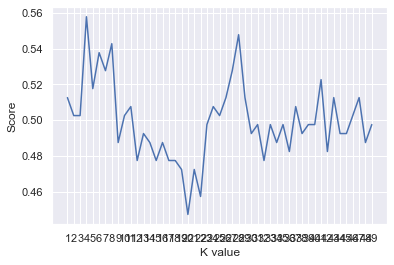

KNN Acc Max 55.78%


In [59]:
scoreListknn = []
for i in range(1,50):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,50), scoreListknn)
plt.xticks(np.arange(1,50,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAccMax = max(scoreListknn)
print("KNN Acc Max {:.2f}%".format(KNAccMax*100))

## 7.3 Support Vector Machine (SVM)

In [60]:
from sklearn.svm import SVC
SVCclassifier = SVC(kernel='linear', max_iter=50)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

#print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy is: {:.2f}%'.format(SVCAcc*100))

[[20 84]
 [ 9 86]]
SVC accuracy is: 53.27%


C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


## 7.5 Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=7)
DTclassifier.fit(X_train, y_train)

y_pred = DTclassifier.predict(X_test)

#print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))

[[21 83]
 [ 9 86]]
Decision Tree accuracy is: 53.77%


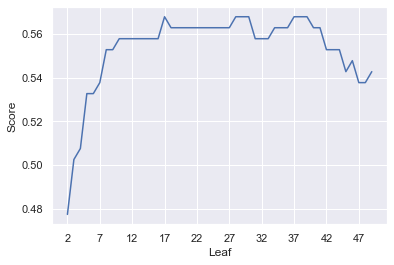

DT Acc Max 56.78%


In [62]:
scoreListDT = []
for i in range(2,50):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,50), scoreListDT)
plt.xticks(np.arange(2,50,5))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAccMax = max(scoreListDT)
print("DT Acc Max {:.2f}%".format(DTAccMax*100))

## 7.6 Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier(max_leaf_nodes=5)
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)

#print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

[[41 63]
 [29 66]]
Random Forest accuracy is: 53.77%


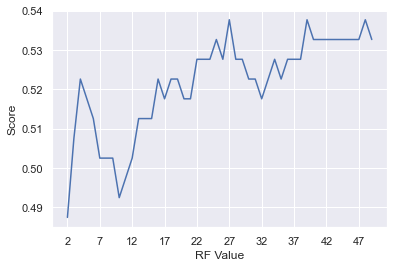

RF Acc Max 53.77%


In [64]:
scoreListRF = []
for i in range(2,50):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,50), scoreListRF)
plt.xticks(np.arange(2,50,5))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAccMax = max(scoreListRF)
print("RF Acc Max {:.2f}%".format(RFAccMax*100))

# 8. Model Comparison 👀

In [65]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 'K Neighbors Max', 'SVM','Decision Tree', 'Decision Tree Max', 'Random Forest', 'Random Forest Max'], 
                        'Accuracy': [LRAcc*100, KNAcc*100, KNAccMax*100, SVCAcc*100, DTAcc*100, DTAccMax*100, RFAcc*100, RFAccMax*100]})
compare.sort_values(by='Accuracy', ascending=False)

Model   Accuracy
5    Decision Tree Max  56.783920
2      K Neighbors Max  55.778894
4        Decision Tree  53.768844
6        Random Forest  53.768844
7    Random Forest Max  53.768844
3                  SVM  53.266332
0  Logistic Regression  51.256281
1          K Neighbors  50.251256

👉 From the results, it can be seen that most of ML models can reach **up to 80% accuracy** in predicting classification of drug type.

# 10. References 🔗
📚 **Kaggle Notebook**:
*  [Drug Classification With Different Algorithms by Görkem Günay](https://www.kaggle.com/gorkemgunay/drug-classification-with-different-algorithms)
*  [Drug Classification - 100% Accuracy by Erin Ward](https://www.kaggle.com/eward96/drug-classification-100-accuracy)
*  [drug prediction with acc(100 %) by Sachin Sharma](https://www.kaggle.com/sachinsharma1123/drug-prediction-with-acc-100)